In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

%matplotlib inline
#mpl.style.use("seaborn")
mpl.style.use("default")
sns.set(font_scale=1.5)

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=13)

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)
print("Seaborn Version: " + sns.__version__)

Pandas Version: 1.2.4
Numpy Version: 1.18.5
Seaborn Version: 0.11.1


In [2]:
df_trips = pd.read_csv("../data/clean/trips.csv", parse_dates=["date_from", "date_until"])
df_trips.head(3)

bike_id                                   user_id           date_from  \
0   143517  A821059B555C7764A2FF801180874A2FCB326222 2014-01-01 00:34:54   
1   119830  1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2 2014-01-01 01:39:55   
2   143501  7AD2C1B70137479062A6DD73815835986677BB2D 2014-01-01 01:40:20   

           date_until                   start_station_name  start_station_id  \
0 2014-01-01 00:50:14                      U-Bahn Baumwall            214170   
1 2014-01-01 01:57:27  Bahnhof Altona Ost/Max-Brauer-Allee            131646   
2 2014-01-01 01:53:09          Weidestraße/Biedermannplatz            211922   

                 end_station_name  end_station_id                 booked_via  \
0  Mönckebergstraße / Rosenstraße          131880                 iPhone SRH   
1     Schulterblatt/Eifflerstraße          131648                Android SRH   
2        Jarrestraße / Rambatzweg          138376  Techniker HH_119 (-2334-)   

   duration_in_min  distance_in_km  speed_in_kmh  
0               16        1.293661      4.851229  
1               18        2.032271      6.774236  
2               13        0.954178      4.403899

In [3]:
weather = pd.read_csv("../data/clean/weather.csv", parse_dates=["datetime"])
weather.set_index("datetime", inplace=True)
weather.head(3)

precip_intensity  precip_probability precip_type  \
datetime                                                                
2014-01-01 00:00:00               0.0                 0.0        none   
2014-01-01 01:00:00               0.0                 0.0        none   
2014-01-01 02:00:00               0.0                 0.0        none   

                     temperature  humidity  wind_speed  wind_bearing  \
datetime                                                               
2014-01-01 00:00:00         1.93      0.81        3.91         161.0   
2014-01-01 01:00:00         1.94      0.85        4.56         140.0   
2014-01-01 02:00:00         1.81      0.85        4.12         143.0   

                     uv_index  visibility  
datetime                                   
2014-01-01 00:00:00         0       9.988  
2014-01-01 01:00:00         0       6.004  
2014-01-01 02:00:00         0       9.988

In [4]:
hourly = pd.read_csv("../data/clean/station_trips_weather.csv", parse_dates=["datetime"])
hourly = hourly.set_index("datetime")
hourly = hourly.sort_index()
hourly.head(3)

station_name  check_ins  check_outs  \
datetime                                                                    
2014-01-01                Allende-Platz/Grindelhof          0           5   
2014-01-01                Alsenstraße/Düppelstraße          3           0   
2014-01-01  Alsterdorf Markt/Evangelische Stiftung          0           0   

            diff  precip_intensity  precip_probability precip_type  \
datetime                                                             
2014-01-01    -5               0.0                 0.0        none   
2014-01-01     3               0.0                 0.0        none   
2014-01-01     0               0.0                 0.0        none   

            temperature  humidity  wind_speed  wind_bearing  uv_index  \
datetime                                                                
2014-01-01         1.93      0.81        3.91         161.0       0.0   
2014-01-01         1.93      0.81        3.91         161.0       0.0   
2014-01-01         1.93      0.81        3.91         161.0       0.0   

            visibility  
datetime                
2014-01-01       9.988  
2014-01-01       9.988  
2014-01-01       9.988

In [5]:
trips = df_trips.set_index("date_from").sort_index()

In [6]:
trips.index.min()

Timestamp('2014-01-01 00:02:51')

In [7]:
trips.index.max()

Timestamp('2017-05-16 08:08:09')

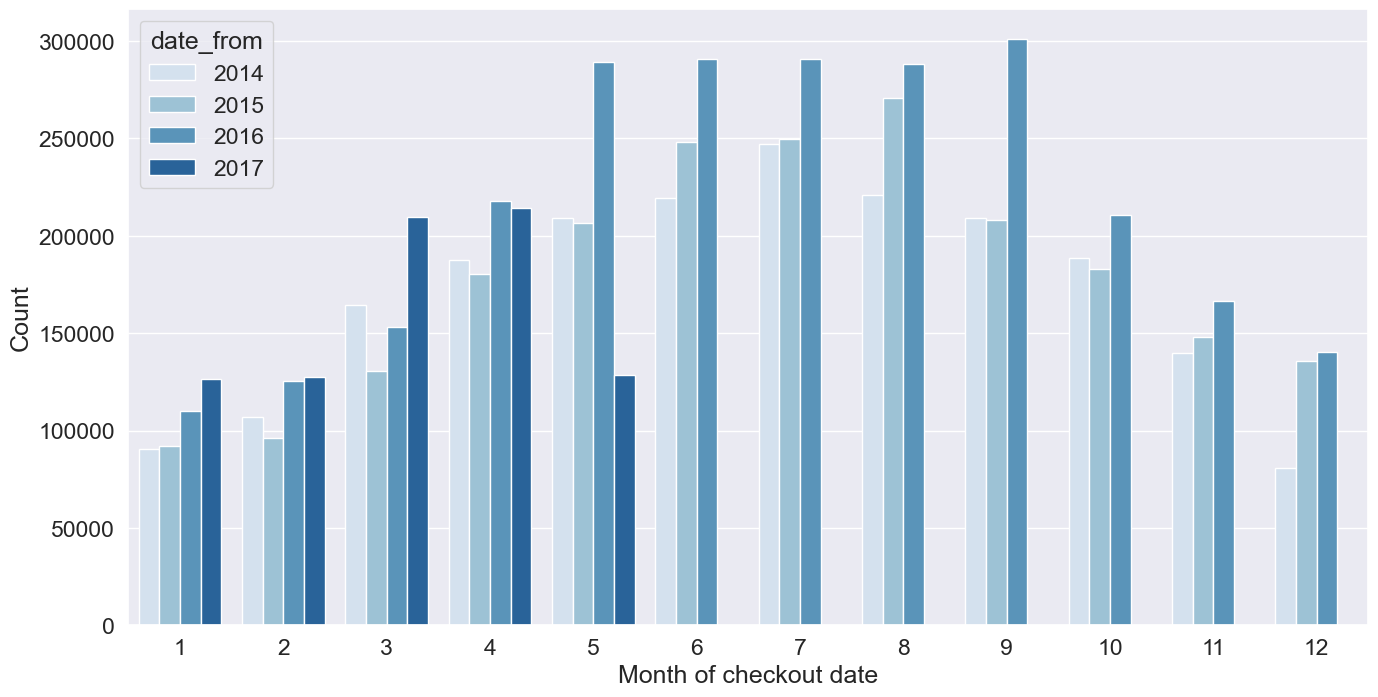

In [10]:
# Trips by month and by year

ax = sns.countplot(
    x=trips.index.month,
    hue=trips.index.year,
    data=trips,
    palette="Blues"
)
ax.set(xlabel="Month of checkout date", ylabel="Count")
plt.savefig("figures/count_trips_per_month.png", bbox_inches="tight")
plt.show()

In [12]:
grouped_by_year_and_month = trips.groupby([trips.index.year, trips.index.month])

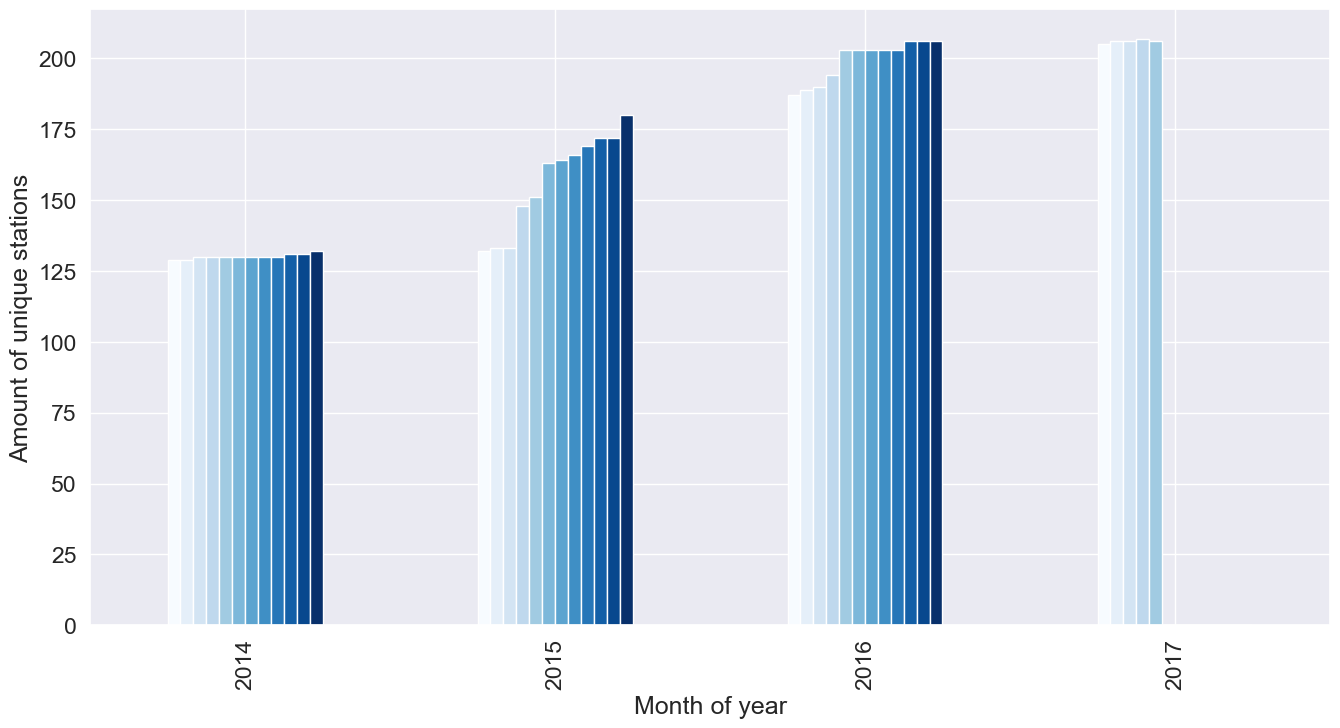

In [13]:
stations_per_month = pd.DataFrame(grouped_by_year_and_month.start_station_name.nunique()).unstack()
stations_per_month.plot(kind="bar", legend=False, cmap="Blues")
plt.xlabel("Month of year")
plt.ylabel("Amount of unique stations")
plt.savefig("figures/count_unique_stations_per_months.png", bbox_inches="tight")
plt.show()

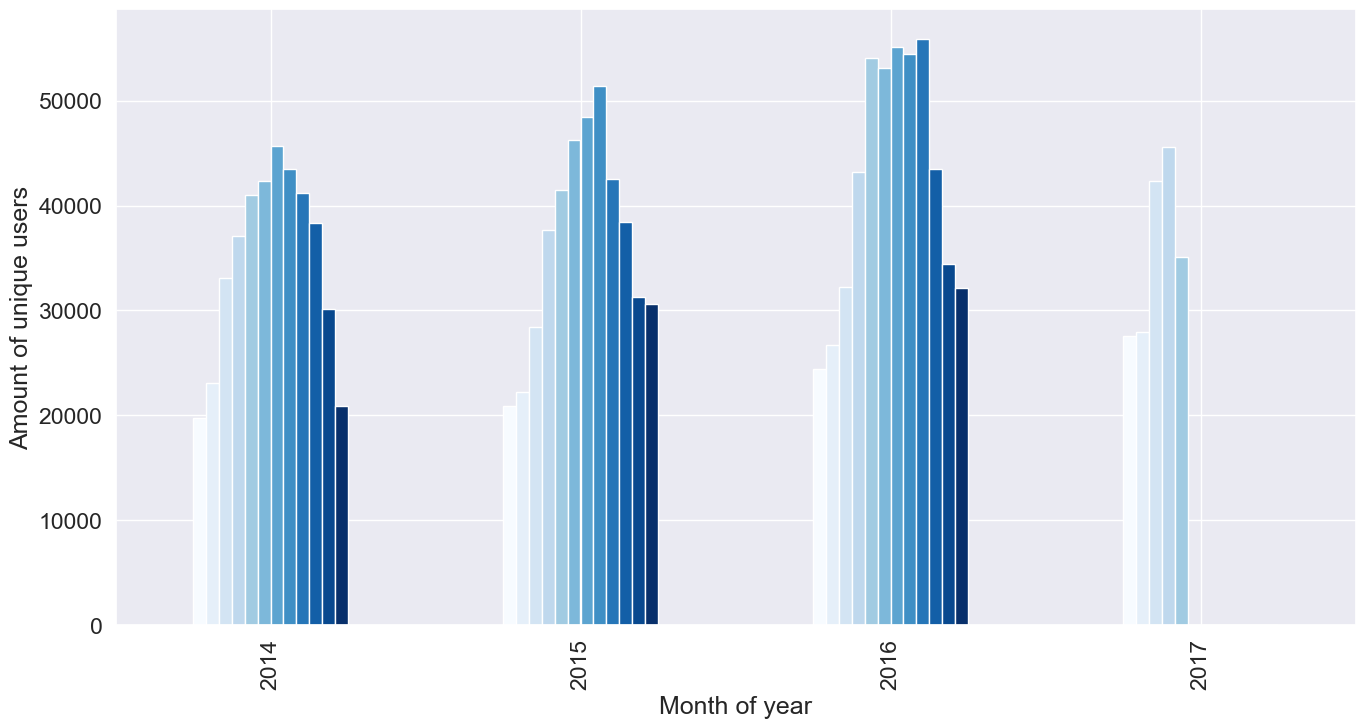

In [14]:
users_per_month = pd.DataFrame(grouped_by_year_and_month.user_id.nunique()).unstack()
users_per_month.plot(kind="bar", legend=False, cmap="Blues")
plt.xlabel("Month of year")
plt.ylabel("Amount of unique users")
plt.savefig("figures/count_unique_users_per_months.png", bbox_inches="tight")
plt.show()

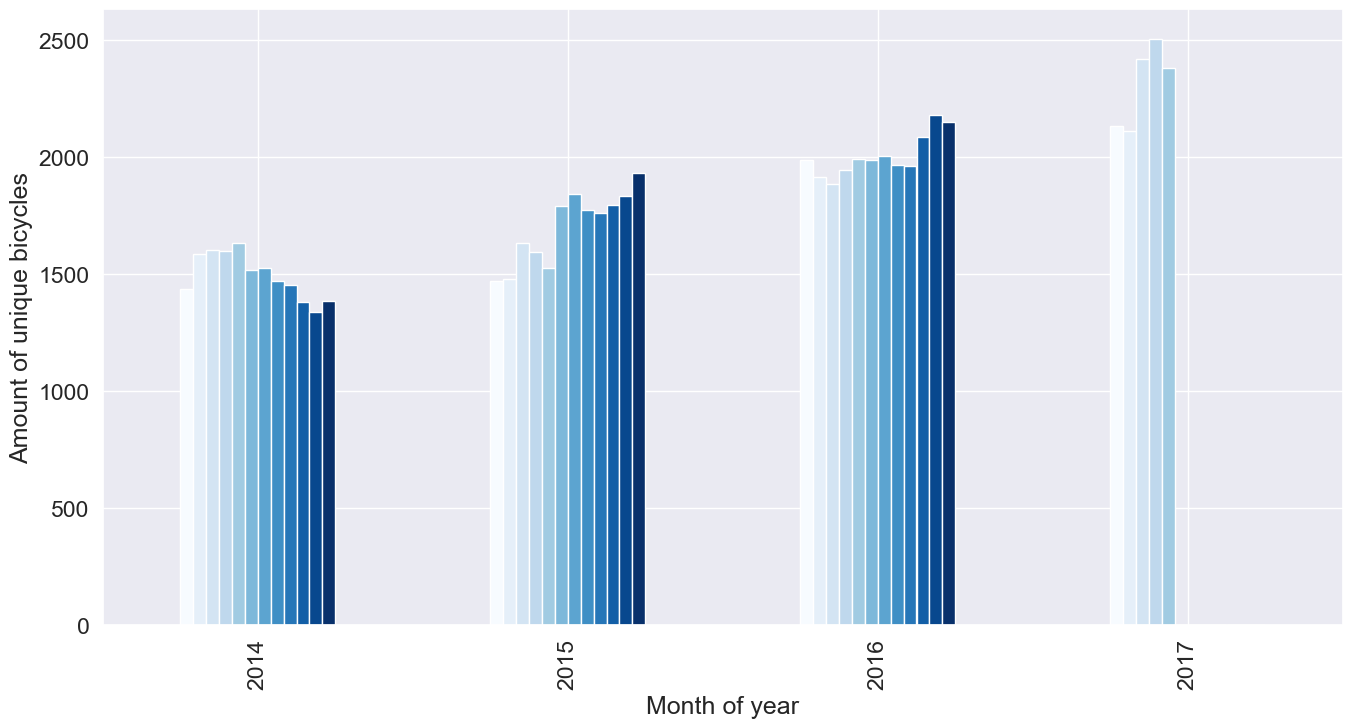

In [15]:
bikes_per_month = pd.DataFrame(grouped_by_year_and_month.bike_id.nunique()).unstack()
bikes_per_month.plot(kind="bar", legend=False, cmap="Blues")
plt.xlabel("Month of year")
plt.ylabel("Amount of unique bicycles")
plt.savefig("figures/count_unique_bikes_per_months.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='duration_in_min', ylabel='Count'>

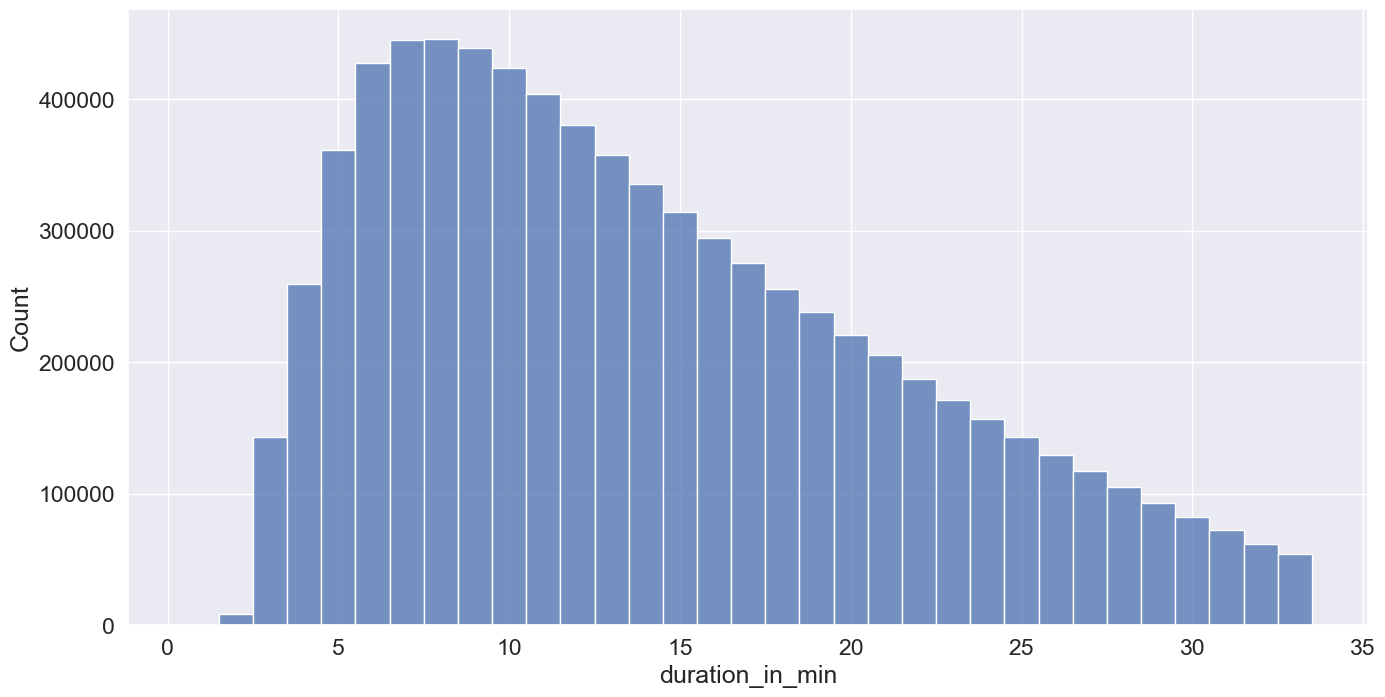

In [16]:
sns.histplot(trips["duration_in_min"], discrete=True)

In [49]:
full_day_start_date = "2014-01-07" # first day
full_day_end_date = "2017-05-14 23:59:59" # last complete day
daily_trips = trips[
    pd.Timestamp(full_day_start_date):pd.Timestamp(full_day_end_date)
].resample("D")[["bike_id"]].count().rename(columns={"bike_id": "count"})

full_week_start_date = "2014-01-07" # first Sunday morning
full_week_end_date = "2017-05-14 23:59:59" # last Monday evening
weekly_mean = daily_trips[
    pd.Timestamp(full_week_start_date):pd.Timestamp(full_week_end_date)
].resample("W").mean()

full_month_start_date = "2014-01-01" # first day
full_month_end_date = "2017-04-30 23:59:59" # last day of last complete month
monthly_mean = daily_trips[
    pd.Timestamp(full_month_start_date):pd.Timestamp(full_month_end_date)
].resample("M").mean()

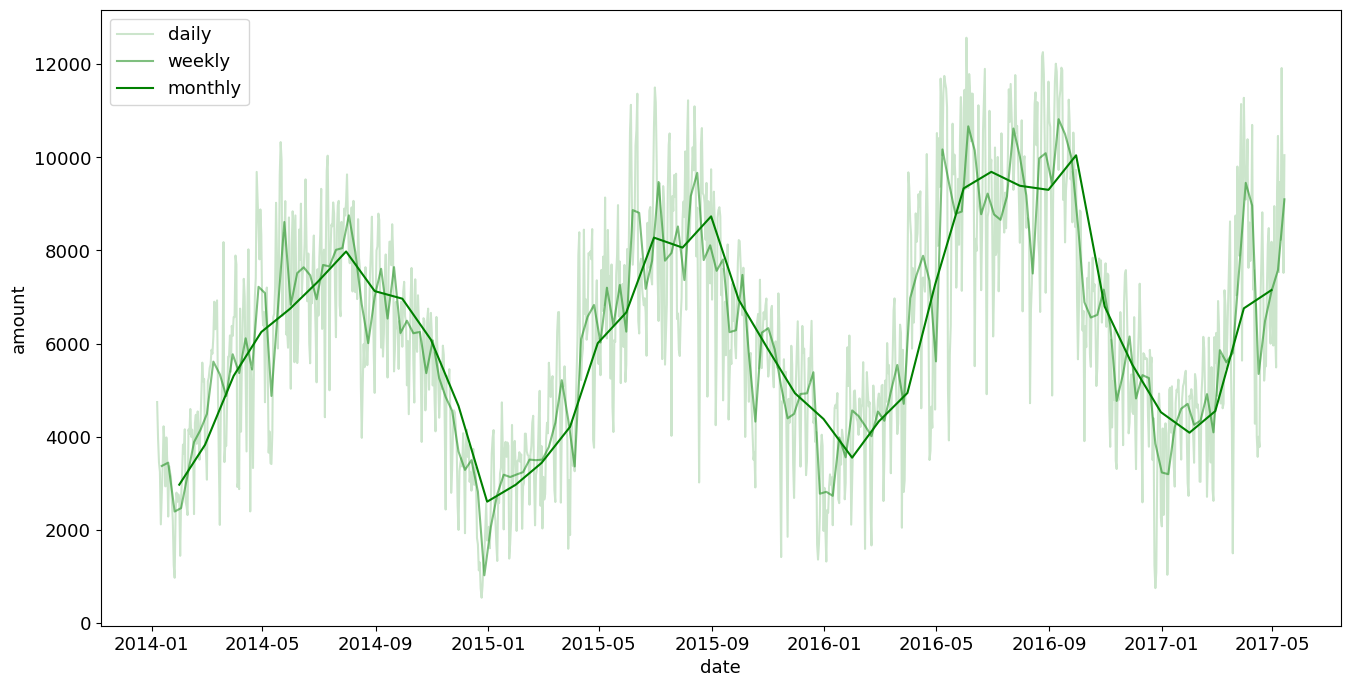

In [56]:
plt.plot(daily_trips, label="daily", color="green", alpha=0.2)
plt.plot(weekly_mean, label="weekly", color="green", alpha=0.5)
plt.plot(monthly_mean, label="monthly", color="green")
plt.xlabel("date")
plt.ylabel("amount")
plt.legend(loc="upper left")
plt.savefig("figures/trips_mean_values.png", bbox_inches="tight")

In [63]:
full_year_start_date = "2014-01-01" # first day
full_year_end_date = "2016-12-12 23:59:59" # last day of last complete year
yearly_count = trips[
    pd.Timestamp(full_year_start_date):pd.Timestamp(full_year_end_date)
].resample("Y")[["bike_id"]].count()

yearly_count

bike_id
date_from          
2014-12-31  2064964
2015-12-31  2149737
2016-12-31  2506183

In [8]:
# Remove the last trips that do not form a complete week
trips = trips.loc["2014-01-01":"2017-05-14"]

In [9]:
weekly_weather = weather.resample("W").mean()
weekly_trips_count = trips[["bike_id"]].resample("W").count().rename(columns={"bike_id": "trip_count"})

weekly = weekly_weather.merge(weekly_trips_count, left_index=True, right_index=True)
weekly

precip_intensity  precip_probability  temperature  humidity  \
2014-01-05          0.013578            0.041000     5.441833  0.859000   
2014-01-12          0.044758            0.072381     6.999286  0.861131   
2014-01-19          0.030308            0.047143     3.906964  0.933155   
2014-01-26          0.000279            0.001488    -4.939464  0.843988   
2014-02-02          0.009192            0.018333    -1.639107  0.864167   
...                      ...                 ...          ...       ...   
2017-04-16          0.071538            0.091845     7.869583  0.749821   
2017-04-23          0.023692            0.040417     5.781012  0.678512   
2017-04-30          0.042130            0.046964     6.534286  0.687202   
2017-05-07          0.037746            0.043988    10.089524  0.707440   
2017-05-14          0.018298            0.024643    11.521071  0.675476   

            wind_speed  wind_bearing  uv_index  visibility  trip_count  
2014-01-05    4.138833    179.083333  0.000000    9.838858       13357  
2014-01-12    5.395536    228.982143  0.000000    9.719101       23329  
2014-01-19    3.653869    133.398810  0.035714    7.280048       24101  
2014-01-26    4.517500    102.607143  0.083333    7.852720       16757  
2014-02-02    4.060714    128.422619  0.130952    7.718012       17274  
...                ...           ...       ...         ...         ...  
2017-04-16    3.919405    265.982143  1.119048    9.730935       37436  
2017-04-23    2.986429    226.461310  1.250000    9.771304       45429  
2017-04-30    2.587500    223.077381  1.410714    9.978899       49881  
2017-05-07    3.171250     88.273810  1.476190    9.553851       53036  
2017-05-14    2.757262    189.336310  1.601190    9.616244       63689  

[176 rows x 9 columns]

In [10]:
weekly_scaled = weekly.copy()
weekly_scaled[weekly_scaled.columns] = StandardScaler().fit_transform(weekly_scaled[weekly_scaled.columns])
weekly_scaled

precip_intensity  precip_probability  temperature  humidity  \
2014-01-05         -0.656009            0.201673    -0.746555  0.877174   
2014-01-12          0.307141            1.301493    -0.496261  0.902046   
2014-01-19         -0.139226            0.416964    -0.993220  1.742704   
2014-01-26         -1.066784           -1.183115    -2.414909  0.701956   
2014-02-02         -0.791484           -0.592734    -1.884517  0.937479   
...                      ...                 ...          ...       ...   
2017-04-16          1.134347            1.983665    -0.356397 -0.397152   
2017-04-23         -0.343591            0.181229    -0.692047 -1.229473   
2017-04-30          0.225965            0.410706    -0.570990 -1.128038   
2017-05-07          0.090531            0.306398     0.000364 -0.891820   
2017-05-14         -0.510209           -0.371602     0.230425 -1.264905   

            wind_speed  wind_bearing  uv_index  visibility  trip_count  
2014-01-05    0.451449     -0.298233 -1.174235    0.795626   -1.973006  
2014-01-12    1.457330      0.771091 -1.174235    0.682331   -1.312600  
2014-01-19    0.063277     -1.277245 -1.118971   -1.625121   -1.261474  
2014-01-26    0.754538     -1.937106 -1.045287   -1.083348   -1.747838  
2014-02-02    0.388921     -1.383884 -0.971603   -1.210788   -1.713599  
...                ...           ...       ...         ...         ...  
2017-04-16    0.275815      1.563996  0.557345    0.693525   -0.378350  
2017-04-23   -0.470951      0.717070  0.759976    0.731716    0.150995  
2017-04-30   -0.790259      0.644553  1.008661    0.928111    0.445833  
2017-05-07   -0.323018     -2.244267  1.109977    0.525997    0.654776  
2017-05-14   -0.654379     -0.078513  1.303398    0.585023    1.360282  

[176 rows x 9 columns]

In [11]:
ProfileReport(weekly, explorative=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

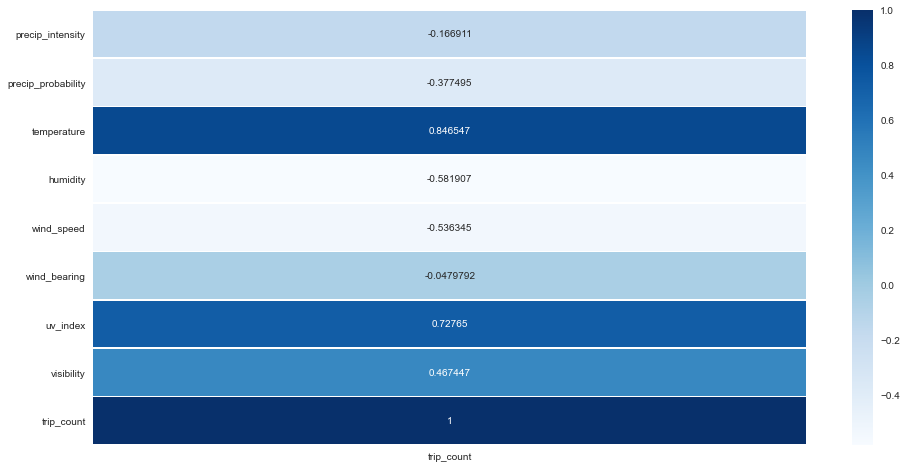

In [12]:
trip_count_corr = weekly_scaled.corr()[["trip_count"]]
sns.heatmap(data=trip_count_corr, annot=True, annot_kws={"size": 10}, fmt="g", linewidths=.5, cmap="Blues")
plt.savefig("figures/trips_weather_corr_heatmap.png", bbox_inches="tight")
plt.show()

<Figure size 1152x576 with 0 Axes>

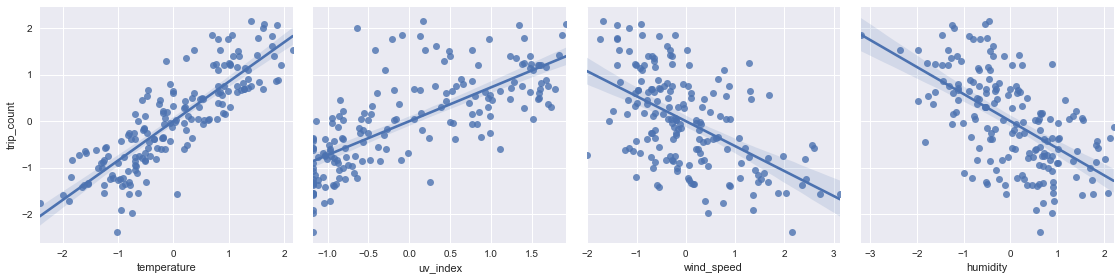

In [13]:
plt.figure(figsize=(16,8))
x_vars = ["temperature", "uv_index", "wind_speed", "humidity"]
y_vars = ["trip_count"]
g = sns.PairGrid(weekly_scaled, x_vars = x_vars, y_vars=y_vars, height=4)
g.map_offdiag(sns.regplot)
plt.savefig("figures/trips_weather_corr_scatter.png", bbox_inches="tight")
plt.show()

<Figure size 1152x576 with 0 Axes>

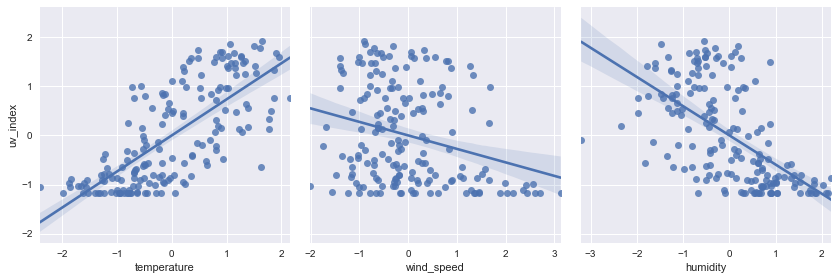

In [14]:
plt.figure(figsize=(16,8))
x_vars = ["temperature", "wind_speed", "humidity"]
y_vars = ["uv_index"]
g = sns.PairGrid(weekly_scaled, x_vars = x_vars, y_vars=y_vars, height=4)
g.map_offdiag(sns.regplot)

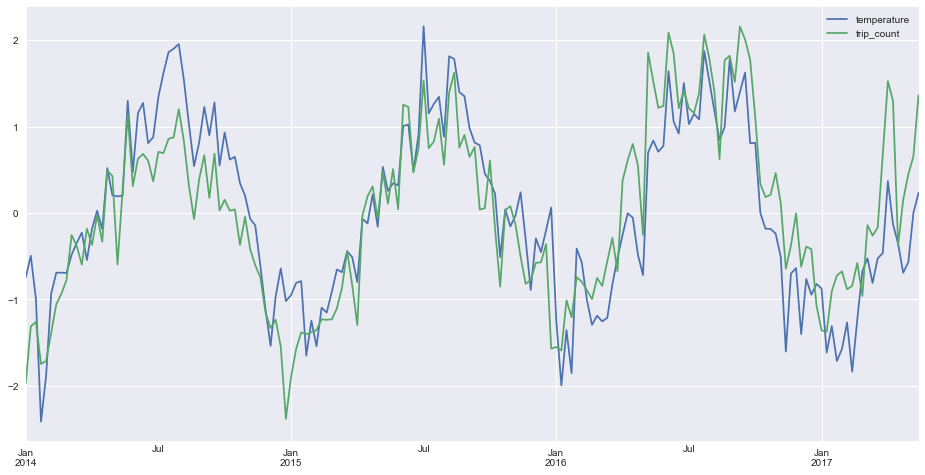

In [15]:
weekly_scaled.temperature.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("figures/trips_temperature.png", bbox_inches="tight")
plt.show()

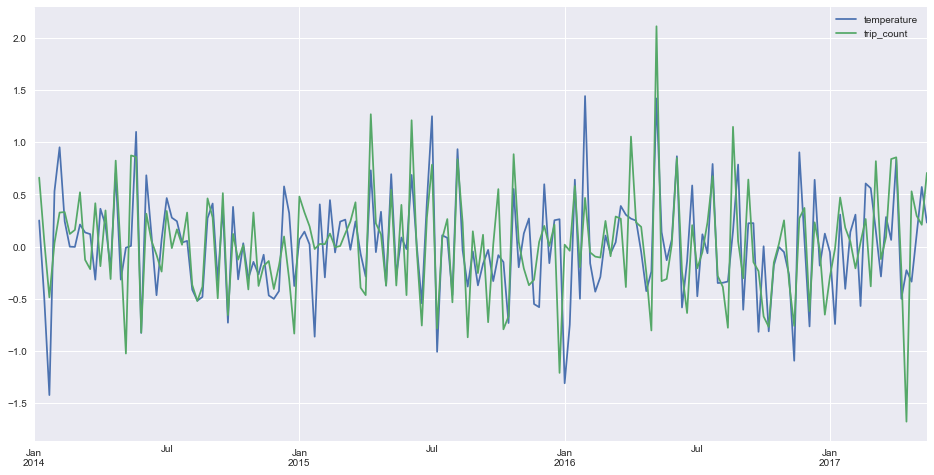

In [16]:
weekly_scaled.diff().temperature.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()

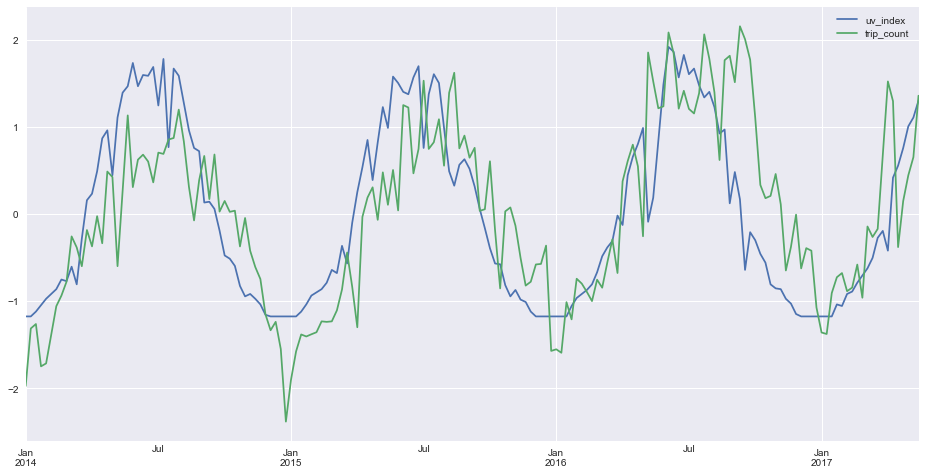

In [17]:
weekly_scaled.uv_index.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("figures/trips_uv_index.png", bbox_inches="tight")
plt.show()

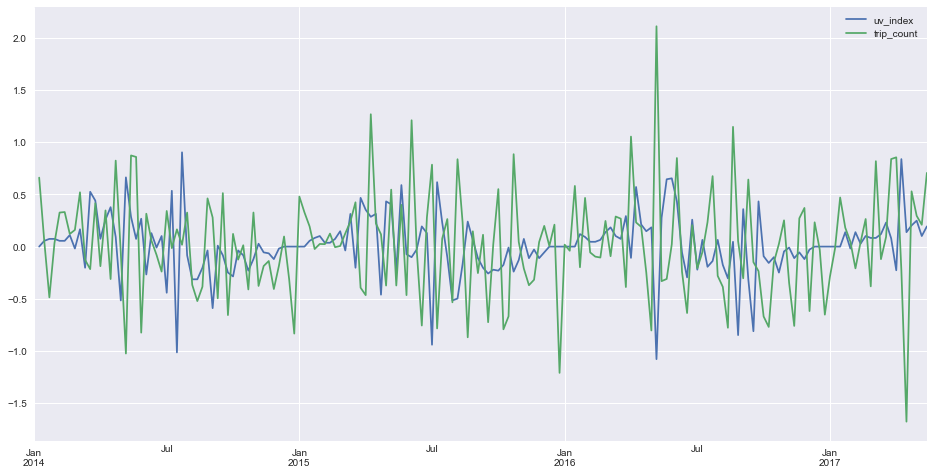

In [18]:
weekly_scaled.diff().uv_index.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()

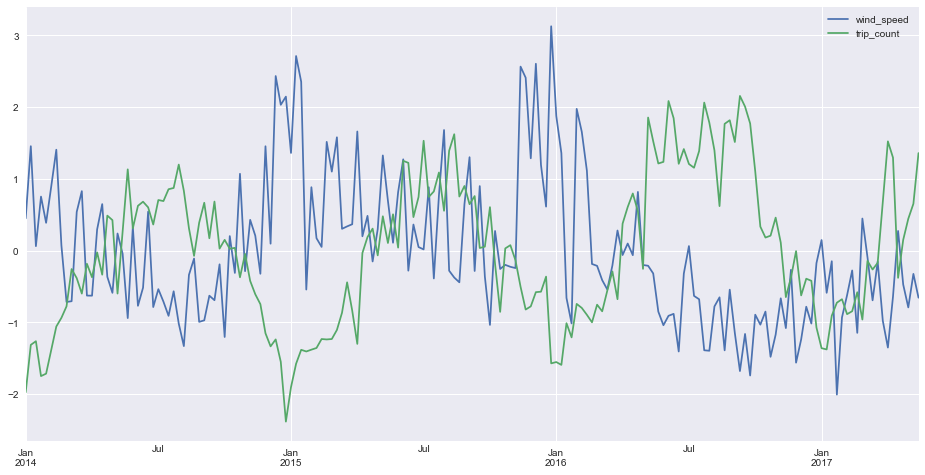

In [19]:
weekly_scaled.wind_speed.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("figures/trips_wind_speed.png", bbox_inches="tight")
plt.show()

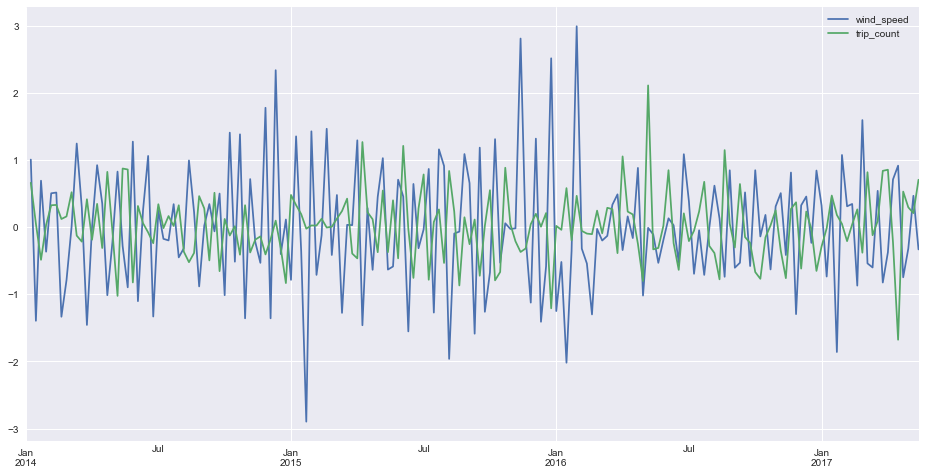

In [20]:
weekly_scaled.diff().wind_speed.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()

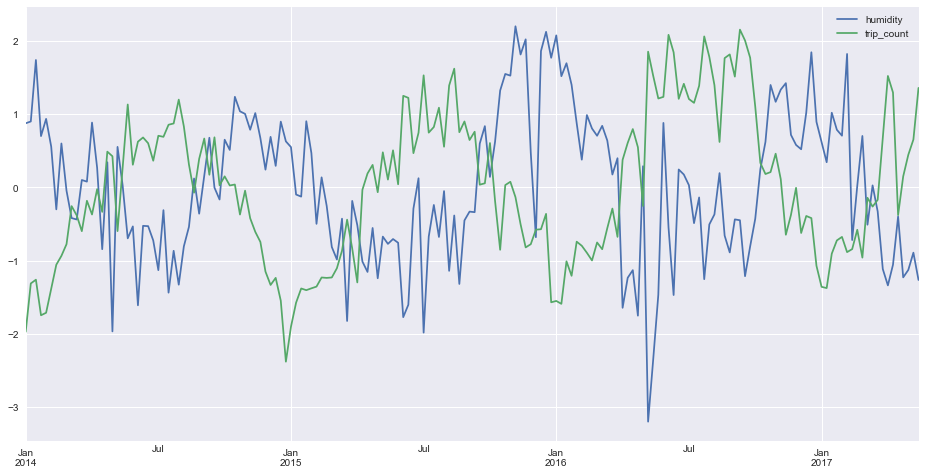

In [21]:
weekly_scaled.humidity.plot()
weekly_scaled.trip_count.plot()
plt.legend()
plt.savefig("figures/trips_humidity.png", bbox_inches="tight")
plt.show()

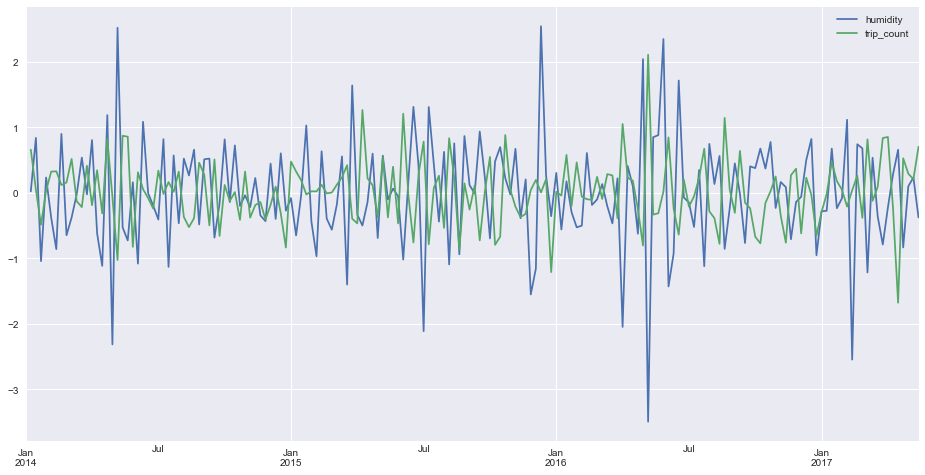

In [22]:
weekly_scaled.diff().humidity.plot()
weekly_scaled.diff().trip_count.plot()
plt.legend()